In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Config
WINE_ID = 111397
MIN_COUNT_RATING = 4

In [3]:
wine_ratings = pd.read_parquet('data/wine_ratings.parquet')

In [4]:
wine_ratings.head()

,WineID,Vintage,MaxRating,MinRating,AverageRating,CountRating
0,100001,1988,5.0,3.0,4.000000,2
1,100001,1999,5.0,4.0,4.500000,2
2,100001,2007,2.5,2.5,2.500000,1
3,100001,2008,5.0,1.0,3.630952,42
4,100001,2009,4.0,4.0,4.000000,1


In [5]:
len(wine_ratings)

1006211

In [6]:
# Filter out Average ratings >= 4.5
wine_ratings_4_5 = wine_ratings[(3.5 <= wine_ratings['AverageRating']) & 
                                (wine_ratings['AverageRating'] < 4.5) & 
                                (wine_ratings['CountRating'] >= 4)]
len(wine_ratings_4_5)

431283

In [7]:
# Get the average rating for WineID = 100401
filter_wine_ratings = wine_ratings[(wine_ratings['WineID'] == WINE_ID) &
                                   (wine_ratings['CountRating'] >= MIN_COUNT_RATING)]

In [8]:
filter_wine_ratings

,WineID,Vintage,MaxRating,MinRating,AverageRating,CountRating
101878,111397,1990,5.0,2.0,4.187500,8
101880,111397,2000,5.0,2.5,3.958333,24
101881,111397,2001,5.0,2.0,3.928571,7
101884,111397,2006,5.0,4.0,4.375000,8
101885,111397,2007,5.0,4.0,4.400000,5
101886,111397,2008,5.0,1.0,3.920000,25
101887,111397,2009,4.5,3.0,3.857143,7
101888,111397,2010,5.0,1.0,4.157328,232
101889,111397,2011,5.0,2.0,3.830357,56
101890,111397,2012,5.0,1.0,3.883721,129


In [9]:
wine_df = pd.read_csv('data/wines.csv')
wine_df.head()

,WineID,WineName,Type,Elaborate,ABV,Body,Acidity,RegionID,WineryID
0,100001,Espumante Moscatel,Sparkling,Varietal/100%,7.5,Medium-bodied,High,1001,10001
1,100002,Ancellotta,Red,Varietal/100%,12.0,Medium-bodied,Medium,1001,10001
2,100003,Cabernet Sauvignon,Red,Varietal/100%,12.0,Full-bodied,High,1001,10002
3,100004,Virtus Moscato,White,Varietal/100%,12.0,Medium-bodied,Medium,1001,10003
4,100005,Maison de Ville Cabernet-Merlot,Red,Assemblage/Bordeaux Red Blend,11.0,Full-bodied,Medium,1001,10000


In [10]:
wine = wine_df[wine_df['WineID'] == WINE_ID]
wine

,WineID,WineName,Type,Elaborate,ABV,Body,Acidity,RegionID,WineryID
11375,111397,Whispering Angel Rosé,Rosé,Varietal/100%,13.0,Full-bodied,High,1266,24240


In [11]:
region_id = wine['RegionID'].values[0]
region_id

1266

In [12]:
## Label Encoding
acid_dict = {'Low': 1, 'Medium': 2, 'High': 3}
body_dict = {'Light-bodied': 1, 'Medium-bodied': 2, 'Full-bodied': 3, 'Very full-bodied': 4}

wine['Acidity'] = wine['Acidity'].map(acid_dict)
wine['Body'] = wine['Body'].map(body_dict)

C:\Users\bbbbb\AppData\Local\Temp\ipykernel_19976\3717883599.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine['Acidity'] = wine['Acidity'].map(acid_dict)
C:\Users\bbbbb\AppData\Local\Temp\ipykernel_19976\3717883599.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine['Body'] = wine['Body'].map(body_dict)


## Get forecast data and evaluate the prediction accuracy of our model

In [13]:
forecast_weather = pd.read_parquet('data/forecast_agg_monthly.parquet')

In [14]:
forecast_weather.head()

,RegionID,year,month,avg_temperature,avg_sunshine_duration,avg_precipitation,avg_humidity,avg_soil_temperature,avg_soil_moisture
0,1000,1949,1,20.893548,36360.254516,5.119355,83.374497,19.860537,0.455046
1,1000,1949,2,20.239286,39061.164286,2.839286,80.038690,19.858333,0.418362
2,1000,1949,3,20.719355,30877.352581,5.893548,85.978495,20.569624,0.444293
3,1000,1949,4,15.953333,33343.093333,2.126667,82.226389,17.799167,0.467942
4,1000,1949,5,13.887097,23280.035161,5.925806,85.336022,15.398253,0.465198


In [15]:
# Get forecast weather RegionID = 1266
filter_forecast_weather = forecast_weather[forecast_weather['RegionID'] == region_id]
filter_forecast_weather

,RegionID,year,month,avg_temperature,avg_sunshine_duration,avg_precipitation,avg_humidity,avg_soil_temperature,avg_soil_moisture
205200,1266,1949,1,0.693548,26658.639677,1.600000,70.028188,1.891275,0.363298
205201,1266,1949,2,3.150000,33497.795714,0.171429,66.632440,2.010119,0.349244
205202,1266,1949,3,3.822581,35100.646452,1.477419,65.658602,3.172581,0.331241
205203,1266,1949,4,11.203333,38599.700000,1.486667,70.629167,7.899444,0.305735
205204,1266,1949,5,11.558065,36490.620000,5.464516,76.885753,9.636962,0.329376
...,...,...,...,...,...,...,...,...,...
206095,1266,2023,8,25.042934,38874.390625,1.588182,57.762260,25.227058,0.119560
206096,1266,2023,9,20.734917,33367.046875,1.970819,66.868721,23.271179,0.114299
206097,1266,2023,10,16.345791,28715.839844,1.681303,72.746979,18.937365,0.110703
206098,1266,2023,11,10.396769,23004.917969,2.637075,76.046143,14.107994,0.108886


## Turn the weather data and wine data into a dataframe

In [16]:
rating_year = 2023
batch_vintage = filter_wine_ratings["Vintage"].to_list()
batch_vintage

[1990,
 2000,
 2001,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020]

In [17]:
# Filter weather where Vintage is in batch_vintage
forecast = filter_forecast_weather[filter_forecast_weather['year'].isin(batch_vintage)]
forecast

,RegionID,year,month,avg_temperature,avg_sunshine_duration,avg_precipitation,avg_humidity,avg_soil_temperature,avg_soil_moisture
205692,1266,1990,1,1.535484,26868.510968,0.661290,69.947581,2.872446,0.257962
205693,1266,1990,2,5.871429,29072.181429,1.564286,79.696429,4.785417,0.276376
205694,1266,1990,3,7.222581,36829.459355,1.232258,67.681452,6.577151,0.282849
205695,1266,1990,4,7.586667,37504.168000,2.523333,71.880556,7.412083,0.287378
205696,1266,1990,5,13.861290,43448.704839,2.651613,73.293011,11.586694,0.285329
...,...,...,...,...,...,...,...,...,...
206059,1266,2020,8,23.341935,43575.488065,1.016129,45.939516,23.519892,0.156401
206060,1266,2020,9,17.696667,37241.309667,1.610000,65.243056,20.740694,0.162149
206061,1266,2020,10,10.903226,30462.965484,2.535484,73.321237,14.604032,0.186941
206062,1266,2020,11,9.216667,29223.586333,0.606667,75.776389,12.148889,0.212697


In [18]:
list_avg_temperature = forecast['avg_temperature'].to_list()
list_avg_sunshine_duration = forecast['avg_sunshine_duration'].to_list()
list_avg_precipitation = forecast['avg_precipitation'].to_list()
list_avg_humidity = forecast['avg_humidity'].to_list()
list_avg_soil_temperature = forecast['avg_soil_temperature'].to_list()
list_avg_soil_moisture = forecast['avg_soil_moisture'].to_list()

In [19]:
length = len(list_avg_temperature)
length

216

In [21]:
list_ABV = wine['ABV'].to_list() * length
list_body = wine['Body'].to_list() * length
list_acidity = wine['Acidity'].to_list() * length

In [22]:
column_minmax = ['ABV',
 'Body',
 'Acidity',
 'avg_temperature',
 'avg_sunshine_duration',
 'avg_precipitation',
 'avg_humidity',
 'avg_soil_temperature',
 'avg_soil_moisture']

In [23]:
minmax_df = pd.DataFrame(columns=column_minmax)

minmax_df['ABV'] = list_ABV
minmax_df['Body'] = list_body
minmax_df['Acidity'] = list_acidity
minmax_df['avg_temperature'] = list_avg_temperature
minmax_df['avg_sunshine_duration'] = list_avg_sunshine_duration
minmax_df['avg_precipitation'] = list_avg_precipitation
minmax_df['avg_humidity'] = list_avg_humidity
minmax_df['avg_soil_temperature'] = list_avg_soil_temperature
minmax_df['avg_soil_moisture'] = list_avg_soil_moisture
minmax_df.head()

,ABV,Body,Acidity,avg_temperature,avg_sunshine_duration,avg_precipitation,avg_humidity,avg_soil_temperature,avg_soil_moisture
0,13.0,3,3,1.535484,26868.510968,0.661290,69.947581,2.872446,0.257962
1,13.0,3,3,5.871429,29072.181429,1.564286,79.696429,4.785417,0.276376
2,13.0,3,3,7.222581,36829.459355,1.232258,67.681452,6.577151,0.282849
3,13.0,3,3,7.586667,37504.168000,2.523333,71.880556,7.412083,0.287378
4,13.0,3,3,13.861290,43448.704839,2.651613,73.293011,11.586694,0.285329


In [24]:
# Duplicate each element in batch_vintage 12 times
list_vintage = np.repeat(batch_vintage, 12)

In [25]:
list_delta_time_rating = np.array(rating_year - np.array(list_vintage))
list_delta_time_rating = list_delta_time_rating.tolist()
list_delta_time_rating

[33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3]

## Normalize the data

In [26]:
import joblib

# load minmax_scaler
with open('./model/minmax_scaler.save', 'rb') as f:
    minmax_scaler = joblib.load(f)

# load standard_scaler
with open('./model/std_scaler.save', 'rb') as f:
    standard_scaler = joblib.load(f)

In [27]:
scaled_list_delta_time_rating = standard_scaler.transform(np.array(list_delta_time_rating).reshape(-1, 1))
scaled_list_delta_time_rating

array([[13.04404627],
       [13.04404627],
       [13.04404627],
       [13.04404627],
       [13.04404627],
       [13.04404627],
       [13.04404627],
       [13.04404627],
       [13.04404627],
       [13.04404627],
       [13.04404627],
       [13.04404627],
       [ 8.68797848],
       [ 8.68797848],
       [ 8.68797848],
       [ 8.68797848],
       [ 8.68797848],
       [ 8.68797848],
       [ 8.68797848],
       [ 8.68797848],
       [ 8.68797848],
       [ 8.68797848],
       [ 8.68797848],
       [ 8.68797848],
       [ 8.2523717 ],
       [ 8.2523717 ],
       [ 8.2523717 ],
       [ 8.2523717 ],
       [ 8.2523717 ],
       [ 8.2523717 ],
       [ 8.2523717 ],
       [ 8.2523717 ],
       [ 8.2523717 ],
       [ 8.2523717 ],
       [ 8.2523717 ],
       [ 8.2523717 ],
       [ 6.07433781],
       [ 6.07433781],
       [ 6.07433781],
       [ 6.07433781],
       [ 6.07433781],
       [ 6.07433781],
       [ 6.07433781],
       [ 6.07433781],
       [ 6.07433781],
       [ 6

In [28]:
# Transform data
scaled_minmax_df = minmax_scaler.transform(minmax_df)

## Input data for TensorFlow model

In [29]:
list_all = []
for i in range(0, length, 12):
    time_series_array = np.array([scaled_minmax_df[:, 3][i:i+12], 
                                  scaled_minmax_df[:, 4][i:i+12],
                                  scaled_minmax_df[:, 5][i:i+12],
                                  scaled_minmax_df[:, 6][i:i+12],
                                  scaled_minmax_df[:, 7][i:i+12],
                                  scaled_minmax_df[:, 8][i:i+12]])
    numerical_array = np.array([scaled_minmax_df[:, 0][i], scaled_minmax_df[:, 1][i],
                                    scaled_minmax_df[:, 2][i],
                                    scaled_list_delta_time_rating[i][0]])
    list_all.append((time_series_array, numerical_array))

In [30]:
time_series_input = np.array([element[0] for element in list_all])
time_series_input = time_series_input.reshape(time_series_input.shape[0], time_series_input.shape[1], time_series_input.shape[2], 1)
numerical_input = np.array([element[1] for element in list_all])
numerical_input.shape

(18, 4)

In [31]:
# Import model from saved file
from tensorflow.keras.models import load_model
model = load_model('model/cnn_model.h5')
model.summary()




Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 time_series_input (InputLa  [(None, 6, 12, 1)]           0         []                            
 yer)                                                                                             
                                                                                                  
 conv2d (Conv2D)             (None, 4, 10, 32)            320       ['time_series_input[0][0]']   
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 2, 5, 32)             0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                           

In [32]:
# Predict the time series
predictions = model.predict([time_series_input, numerical_input])
predictions

1/1 [==============================] - 0s 252ms/step


array([[4.0467124],
       [4.013153 ],
       [4.0684915],
       [3.9948502],
       [4.0878887],
       [4.0059495],
       [4.0649867],
       [4.0122075],
       [4.0661116],
       [3.9958887],
       [3.95463  ],
       [4.0338264],
       [4.081717 ],
       [3.970511 ],
       [3.9916046],
       [3.9593477],
       [3.9242566],
       [3.9550016]], dtype=float32)

In [33]:
# Turn the prediction into a list
list_predict_rating = predictions.tolist()
list_predict_rating = [item for sublist in list_predict_rating for item in sublist]
list_predict_rating = [float(item) for item in list_predict_rating]
list_predict_rating

[4.046712398529053,
 4.013153076171875,
 4.068491458892822,
 3.9948501586914062,
 4.087888717651367,
 4.0059494972229,
 4.064986705780029,
 4.012207508087158,
 4.0661115646362305,
 3.9958887100219727,
 3.954629898071289,
 4.0338263511657715,
 4.081717014312744,
 3.970510959625244,
 3.9916045665740967,
 3.959347724914551,
 3.9242565631866455,
 3.9550015926361084]

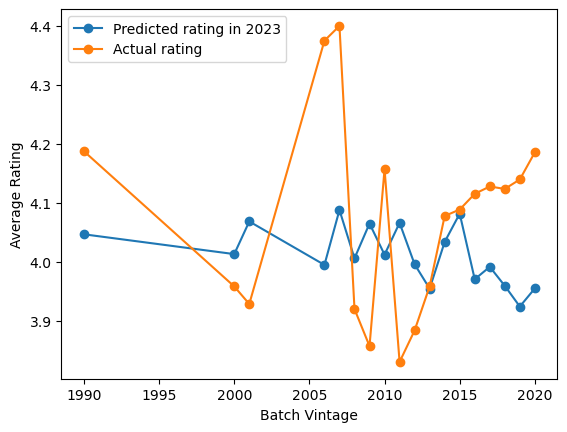

In [34]:
# Plot point of average rating, prediction for WineID = 111397 by Vintage
plt.plot(batch_vintage, list_predict_rating, '-o', label='Predicted rating in 2023')
plt.plot(batch_vintage, filter_wine_ratings['AverageRating'], '-o', label='Actual rating')
plt.xlabel('Batch Vintage')
plt.ylabel('Average Rating')
plt.legend()
plt.show()